**Assignment: Gaussian Naive Bayes for Titanic Survival Prediction**

Instructions:

You are required to write Python code to solve the given problems.

Use the scikit-learn library for implementing Gaussian Naive Bayes.

Comment your code appropriately for better understanding.

Submit the Python script with the completed code.

1. Load the "Titanic" dataset using pandas and explore its structure and contents. Show the result.
2. Perform data preprocessing tasks such as handling missing values, feature selection, and feature encoding. Consider using techniques like imputation for missing values and one-hot encoding for categorical variables.
3. Split the dataset into training and testing sets.

*Use 7x% of the data for training and (100 - 7x)% for testing.*

**[x = 2nd last digit of your roll number]**

*comment your roll number and 2nd last digit*

4. Implement Gaussian Naive Bayes using the training set. Train the model on the selected features and the corresponding target variable (Survived).
5. Apply the trained model to make predictions on the testing set.
6. Evaluate the performance of the Gaussian Naive Bayes model by calculating metrics such as accuracy, precision, recall, and F1-score. Interpret the results and analyze the model's effectiveness. (Be creative here)
7. Any chart that you want to implement , do it (Bonus)

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [8]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

df = pd.read_csv('Titanic-Dataset.csv')

Saving Titanic-Dataset.csv to Titanic-Dataset (2).csv


In [9]:
# Handling missing values
#Using Imputation technique for age

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [10]:

from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        encoder = OneHotEncoder()

        matrix = encoder.fit_transform(X[['Sex']]).toarray()

        column_names = ["Female","Male"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        return X

In [11]:
class FeatureDropper(BaseEstimator, TransformerMixin):

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex"],axis=1,errors="ignore")

In [12]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer",AgeImputer()),
                     ("featureencoder", FeatureEncoder()),
                    ("featuredropper",FeatureDropper())])
df = pipeline.fit_transform(df)
df.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Female,Male
0,1,0,3,22.0,1,0,7.2500,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,1.0,0.0
2,3,1,3,26.0,0,0,7.9250,1.0,0.0
3,4,1,1,35.0,1,0,53.1000,1.0,0.0
4,5,0,3,35.0,0,0,8.0500,0.0,1.0


In [17]:
# Split the data into features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]
# Split the data into training and testing sets
# Roll No: 220825, Second Last digit x = 2 , therefor for training = 14% and testing = 86%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.86,random_state=42)
 # Create a Gaussian Naive Bayes classifier and fit the training data
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [19]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the performance of the Gaussian Naive Bayes model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7926988265971316
Precision: 0.7553956834532374
Recall: 0.6976744186046512
F1-Score: 0.7253886010362693


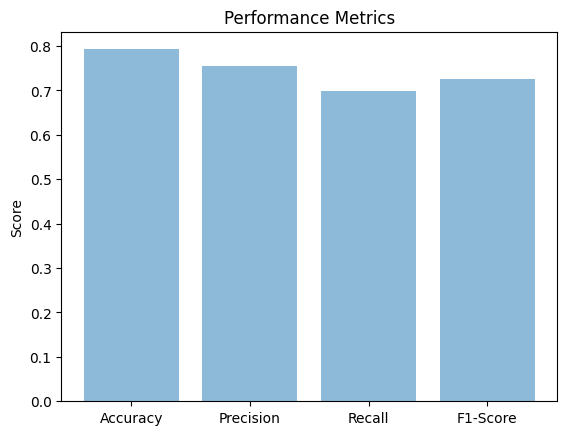

In [21]:
#Chart to visualize the performance metrics
import matplotlib.pyplot as plt
import numpy as np

labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics = [accuracy, precision, recall, f1]

x_pos = np.arange(len(labels))

plt.bar(x_pos, metrics, align='center', alpha=0.5)
plt.xticks(x_pos, labels)
plt.ylabel('Score')
plt.title('Performance Metrics')

plt.show()